# Binning output analysis

In [1]:
# import libraries to perform the analysis
import csv
import matplotlib.pyplot as plt

In [2]:
# path to binning output file
binning_path = "../../../LiME_binning results/paired_SRR184065/SRR1804065_1.filtr+RC.fasta.a50.t55.txt"

In [3]:
binning_output = open(binning_path, "r")

# read binning output 
cluster_index = []
for line in binning_output:
    cluster_index.append(int(line))
    
binning_output.close()

# number of clusters
max_val = max(cluster_index) + 1 

cluster_cardinality = []
# cluster_cardinality list initialization
for i in range(0, max_val):
    cluster_cardinality.append(0)
    
# clusters cardinality calculation
for i in range(0, len(cluster_index)):
    temp = cluster_index[i]
    cluster_cardinality[temp] = cluster_cardinality[temp] + 1

max_set_size = max(cluster_cardinality)
max_set = cluster_cardinality.index(max_set_size)

# calculation of the number of clusters with only one read 
non_grouped_reads = 0 
for i in range(0, len(cluster_cardinality)):
    if cluster_cardinality[i] == 1:
        non_grouped_reads = non_grouped_reads + 1
        
# cluster_cardinality list ordered in non-ascending order
# i.e. from highest to lowest cardinality    
cluster_cardinality.sort(reverse = True)

In [4]:
# print the computed info about the binning output
print("number of reads: ", len(cluster_index))
print("number of clusters: ", len(cluster_cardinality))
print("max set size: ", max_set_size)
print("max set index: ", max_set)
print("number of non grouped reads: ", non_grouped_reads)
print("Sizes of ten largest sets:")
for i in range(0, 10):
    print(cluster_cardinality[i])

number of reads:  5654624
number of clusters:  2218875
max set size:  146156
max set index:  38
number of non grouped reads:  1828123
Sizes of ten largest sets:
146156
130484
96553
95017
69298
46480
42018
41777
41497
41011


In [5]:
# create a .csv file called 'binning_output_analysis' contaning the computed info about the binning output
with open('binning_output_analysis.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["parameter", "value"])
    writer.writerow(["number of reads", len(cluster_index)])
    writer.writerow(["number of clusters", len(cluster_cardinality)])
    writer.writerow(["max set size", max_set_size])
    writer.writerow(["max set index", max_set])
    writer.writerow(["non grouped reads", non_grouped_reads])

## Top k clusters

Running the cells below will generate the 'top k clusters' graph that displays the cardinality and the correspondent index of each of the k clusters with higher number of reads. In the graph, the clusters are oredered in non-ascending order of cardinality.

In [6]:
# set the value of k (you can change it according to your need)
k = 20

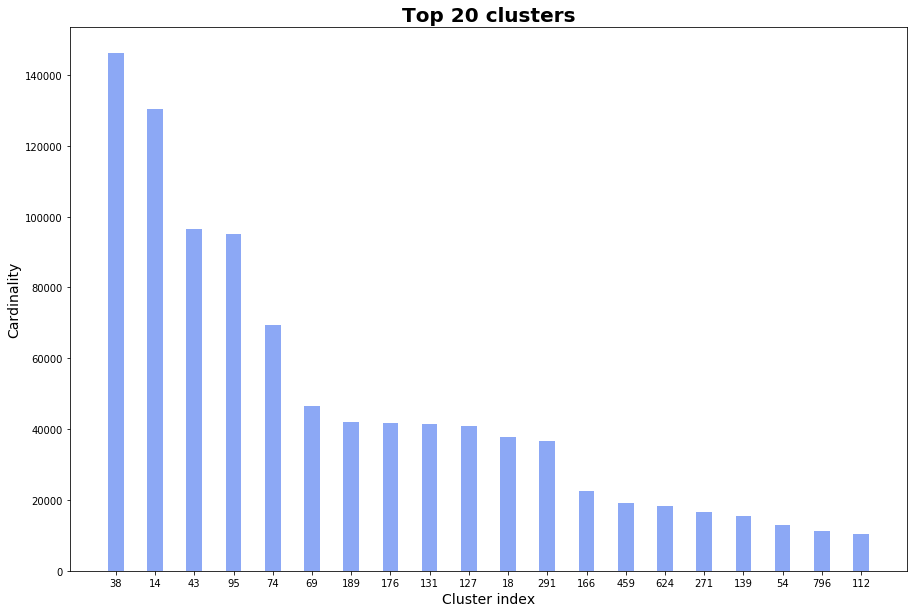

In [7]:
# create a dict with {key: value} pairs where key is equal to the cluster index and value is correspondent cluster cardinality
cluster_dict = {}

for cluster in cluster_index:
    
    if cluster in cluster_dict.keys():
        cluster_dict[cluster] = cluster_dict[cluster] + 1 
    
    else:
        cluster_dict[cluster] = 1

# sort the cluster_dict in non-ascending order
sorted_tuples = sorted(cluster_dict.items(), key=lambda item: item[1], reverse = True)
sorted_dict = {k: v for k, v in sorted_tuples}

# get top k clusters list
top_k_cluster = []
i = 0
for cluster, cardinality in sorted_dict.items():
    if i < k:
        top_k_cluster.append([cluster, cardinality])
    else:
        break    
    i = i + 1

# generate top k clusters graph
top_k_cluster_index = []
top_k_cluster_cardinality = []

for i in range(0, k):
    top_k_cluster_index.append(str(top_k_cluster[i][0]))
    top_k_cluster_cardinality.append(top_k_cluster[i][1])

plt.figure(figsize=(15,10))
width = 0.4

plt.bar(top_k_cluster_index, top_k_cluster_cardinality, width = width, color='#8ca8f5', label='Top clusters')

plt.xlabel('Cluster index', fontsize = 14)
plt.ylabel('Cardinality',fontsize = 14)
plt.title('Top '+ str(k) +' clusters', fontweight='bold', fontsize=20)

# save the figure
plt.savefig('Top ' + str(k) + ' clusters', dpi=300, bbox_inches='tight')

plt.show()